<a href="https://colab.research.google.com/github/Eric428-a/-LMS-Learning-Management-System/blob/master/2_5_15_a_Customer_Feedback_Analysis_Starter_Kit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries

In [ ]:
import pandas as pd  # For data manipulation

In [ ]:
import matplotlib.pyplot as plt  # For visualization

In [ ]:
import seaborn as sns  # For statistical data visualization

In [ ]:
from textblob import TextBlob  # For sentiment analysis

# Step 1: Data Loading and Cleaning

In [ ]:
# Load the dataset and perform initial cleaning to prepare it for analysis

In [ ]:
# Load the dataset

In [ ]:
try:
    df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')  # Reading the dataset from a CSV file
except Exception as e:
    print("An error occurred while loading the dataset:", e)
    df = None

In [ ]:
# Drop unnecessary columns

In [ ]:
df.drop(['Unnamed: 0', 'Clothing ID'], axis=1, inplace=True)  # Dropping unnecessary columns

In [ ]:
# Drop rows with missing reviews

In [ ]:
df.dropna(subset=['Review Text'], inplace=True)  # Dropping rows with missing review text

# Step 2: Exploratory Data Analysis (EDA)

In [ ]:
# Gain insights into the dataset to understand its characteristics and distributions

In [ ]:
# Visualize the distribution of ratings

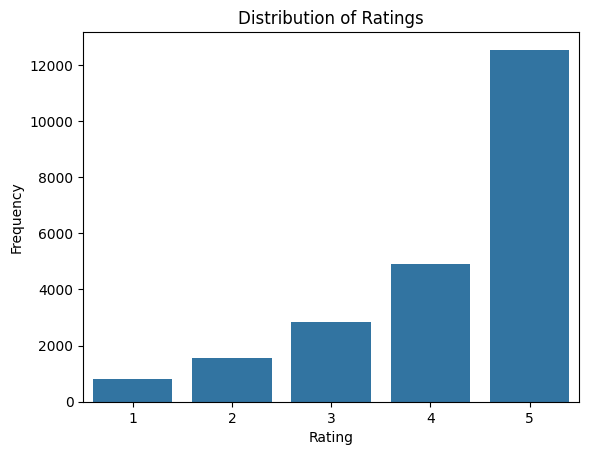

In [ ]:
sns.countplot(x='Rating', data=df)  # Creating a countplot for the distribution of ratings
plt.title('Distribution of Ratings')  # Setting the title of the plot
plt.xlabel('Rating')  # Setting the label for the x-axis
plt.ylabel('Frequency')  # Setting the label for the y-axis
plt.show()  # Displaying the plot

In [ ]:
# Visualize the word count distribution of reviews

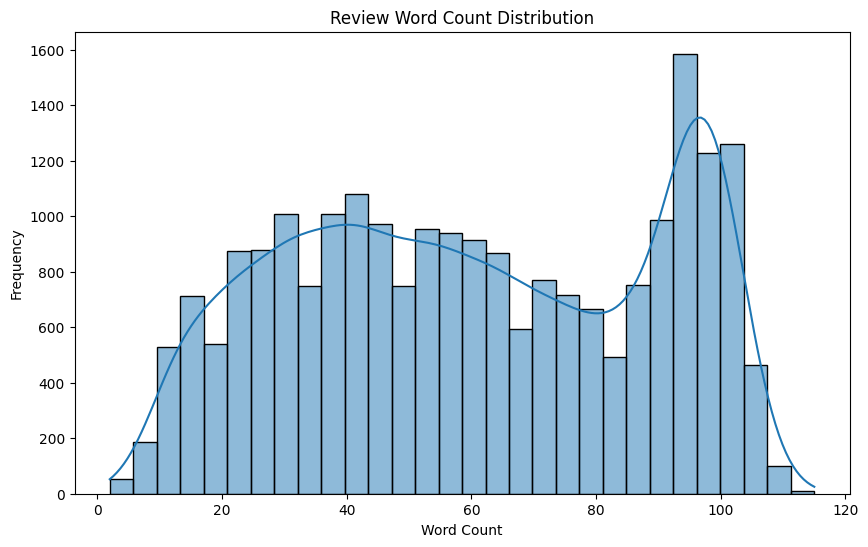

In [ ]:
plt.figure(figsize=(10, 6))  # Setting the figure size
sns.histplot(df['Review Text'].apply(lambda x: len(x.split())), bins=30, kde=True)  # Creating a histogram for word count distribution
plt.title('Review Word Count Distribution')  # Setting the title of the plot
plt.xlabel('Word Count')  # Setting the label for the x-axis
plt.ylabel('Frequency')  # Setting the label for the y-axis
plt.show()  # Displaying the plot

# Step 3: Sentiment Analysis

In [ ]:
# Analyze the sentiment of customer reviews to understand customer satisfaction

In [ ]:
# Categorize reviews into positive, neutral, and negative sentiments using TextBlob

In [ ]:
def categorize_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [ ]:
# Apply the function

In [ ]:
df['Sentiment'] = df['Review Text'].apply(categorize_sentiment)

In [ ]:
# Visualize sentiment distribution

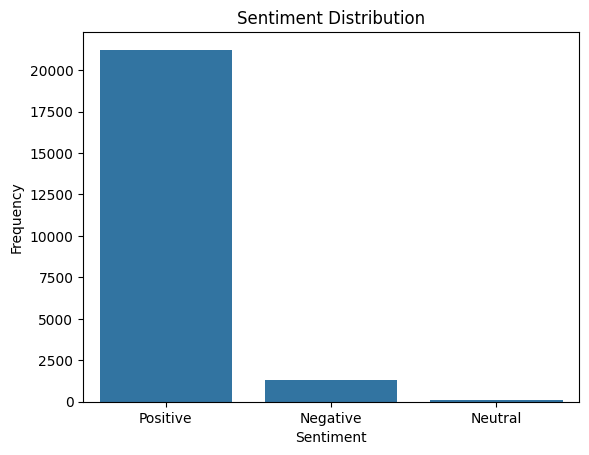

In [ ]:
sns.countplot(x='Sentiment', data=df)  # Creating a countplot for sentiment distribution
plt.title('Sentiment Distribution')  # Setting the title of the plot
plt.xlabel('Sentiment')  # Setting the label for the x-axis
plt.ylabel('Frequency')  # Setting the label for the y-axis
plt.show()  # Displaying the plot

# Step 4: Recommendations for Model Performance Improvement

In [ ]:
# Enhance the performance of the sentiment analysis model

In [ ]:
# Implement advanced text preprocessing techniques, experiment with feature engineering methods,

In [ ]:
# try different machine learning models, perform hyperparameter tuning, and implement cross-validation

In [ ]:
#For example

In [ ]:
# import some additional libraries here

In [ ]:
from sklearn.model_selection import train_test_split  # Importing train_test_split function from sklearn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Importing TfidfVectorizer from sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression  # Importing LogisticRegression from sklearn

In [ ]:
from sklearn.model_selection import RandomizedSearchCV  # Importing RandomizedSearchCV from sklearn

In [ ]:
# Splitting the data into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Review Text'], df['Sentiment'], test_size=0.2, random_state=42)  # Splitting the dataset into train and test sets


In [ ]:
# Creating a TF-IDF vectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer()  # Initializing a TF-IDF vectorizer

In [ ]:
# Transforming text data

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)  # Fitting and transforming the training data

In [ ]:
# Creating a logistic regression model

In [ ]:
logistic_regression = LogisticRegression()  # Initializing a logistic regression model

In [ ]:
# Parameters for randomized search

In [ ]:
parameters = {
    'C': [0.1, 1.0, 10.0],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty term
    'solver': ['liblinear']  # Solver for logistic regression
}

In [ ]:
# Performing randomized search for hyperparameter tuning

In [ ]:
randomized_search = RandomizedSearchCV(logistic_regression, parameters, cv=3, n_iter=5, random_state=42)  # Initializing a RandomizedSearchCV object


In [ ]:
randomized_search.fit(X_train_tfidf, y_train)  # Fitting the RandomizedSearchCV object to the training data

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': [0.1, 1.0, 10.0],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   random_state=42)

In [ ]:
# Best parameters found

In [ ]:
print("Best parameters:", randomized_search.best_params_)  # Printing the best parameters found by RandomizedSearchCV

Best parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10.0}


In [ ]:
# Transforming test data

In [ ]:
X_test_tfidf = tfidf_vectorizer.transform(X_test)  # Transforming the test data using the TF-IDF vectorizer

In [ ]:
# Evaluating the model

In [ ]:
accuracy = randomized_search.score(X_test_tfidf, y_test)  # Calculating the accuracy of the model

In [ ]:
print("Accuracy:", accuracy)  # Printing the accuracy of the model

Accuracy: 0.9642305144623537


# Step 5: Impactful Visualizations

In [ ]:
# Create visualizations to present findings effectively

In [ ]:
# Visualize sentiment distribution by rating

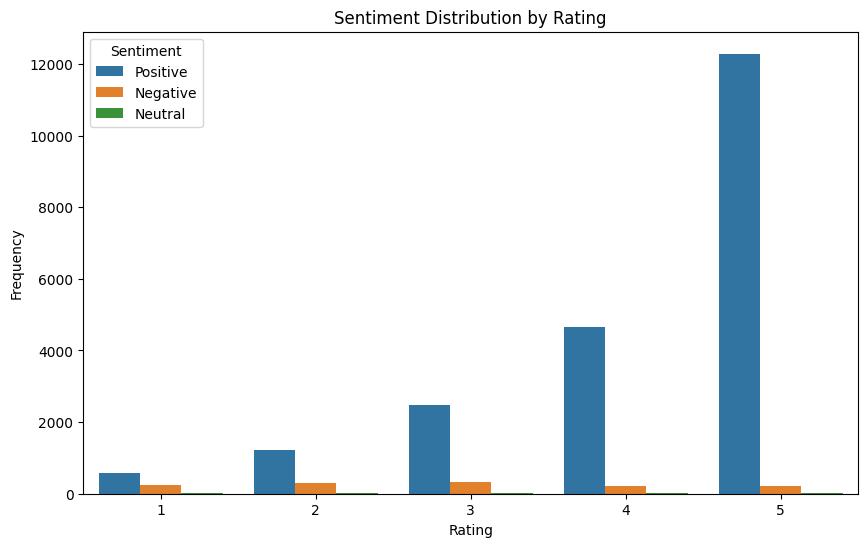

In [ ]:
plt.figure(figsize=(10, 6))  # Setting the figure size
sns.countplot(x='Rating', hue='Sentiment', data=df)  # Creating a countplot for sentiment distribution by rating
plt.title('Sentiment Distribution by Rating')  # Setting the title of the plot
plt.xlabel('Rating')  # Setting the label for the x-axis
plt.ylabel('Frequency')  # Setting the label for the y-axis
plt.legend(title='Sentiment')  # Adding a legend with title
plt.show()  # Displaying the plot

In [ ]:
# Visualize average word count by sentiment

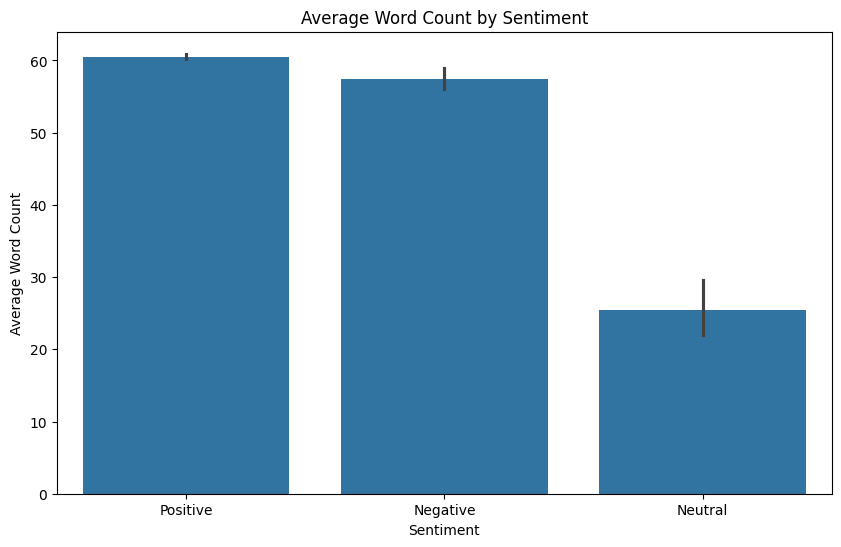

In [ ]:
plt.figure(figsize=(10, 6))  # Setting the figure size
# Calculate word count dynamically from the 'Review Text' column
df['Word Count'] = df['Review Text'].apply(lambda x: len(x.split()))
sns.barplot(x='Sentiment', y='Word Count', data=df)  # Creating a barplot for average word count by sentiment
plt.title('Average Word Count by Sentiment')  # Setting the title of the plot
plt.xlabel('Sentiment')  # Setting the label for the x-axis
plt.ylabel('Average Word Count')  # Setting the label for the y-axis
plt.show()  # Displaying the plot

# ADDITIONAL TASKS FROM THE DATSET

# Word Cloud Visualization

In [ ]:
#import some additional libraries

In [ ]:
from wordcloud import WordCloud  # Importing WordCloud from wordcloud module

In [ ]:
import matplotlib.pyplot as plt  # Importing matplotlib for visualization

In [ ]:
# Generating word cloud

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Review Text'].dropna()))

In [ ]:
# Generating a word cloud based on the review text data. The WordCloud object is initialized with specific parameters such as width, height, and background color.


In [ ]:
# Displaying the word cloud

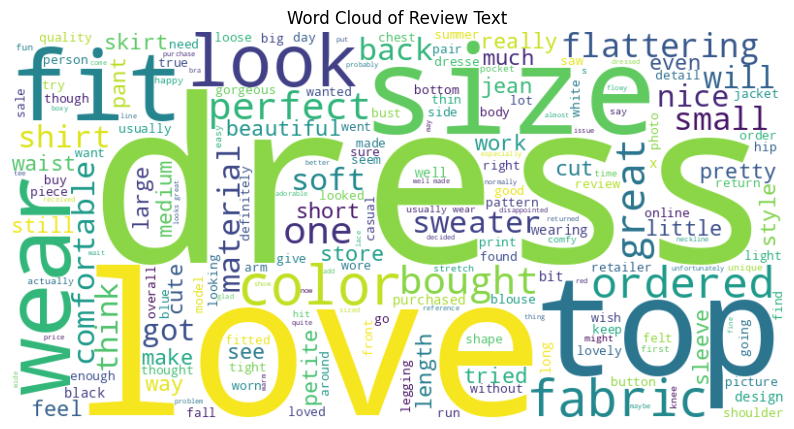

In [ ]:
plt.figure(figsize=(10, 6))  # Creating a new figure with specified size
plt.imshow(wordcloud, interpolation='bilinear')  # Displaying the word cloud with bilinear interpolation
plt.title('Word Cloud of Review Text')  # Setting the title of the plot
plt.axis('off')  # Turning off axis labels
plt.show()  # Displaying the plot

In [ ]:
# Save the word cloud to a file as a JPEG image

In [ ]:
wordcloud.to_file("wordcloud.jpg")  # Save the word cloud image as "wordcloud.jpg"

# Topic Modeling

In [ ]:
# import some additional libraries

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation  # Importing LatentDirichletAllocation from sklearn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Importing TfidfVectorizer from sklearn to create TF-IDF vectorizer


In [ ]:
# Creating a TF-IDF vectorizer for topic modeling

In [ ]:
tfidf_vectorizer_lda = TfidfVectorizer(max_features=1000, stop_words='english')

In [ ]:
X_tfidf_lda = tfidf_vectorizer_lda.fit_transform(df['Review Text'].dropna())

In [ ]:
# Creating a TF-IDF vectorizer object with maximum features set to 1000 and stop words removed. The vectorizer is fitted to the review text data to transform it into TF-IDF matrix.


In [ ]:
# Initializing LDA model

In [ ]:
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
# Initializing the Latent Dirichlet Allocation (LDA) model with 5 topics and setting random state for reproducibility.


In [ ]:
# Fitting LDA model

In [ ]:
lda_model.fit(X_tfidf_lda)

LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
# Fitting the LDA model to the TF-IDF matrix to learn the topics from the review text data.

In [ ]:
# Displaying the top words for each topic

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx + 1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [ ]:
no_top_words = 10

In [ ]:
feature_names = tfidf_vectorizer_lda.get_feature_names_out()

In [ ]:
display_topics(lda_model, feature_names, no_top_words)

Topic 1:
dress love beautiful wear flattering fits great perfect compliments size
Topic 2:
size small dress fit waist large medium ordered like wear
Topic 3:
like dress shirt just fabric really fit size material look
Topic 4:
sweater love color great soft bought wear store size perfect
Topic 5:
jeans great love pants comfortable wear perfect fit pair soft


In [ ]:
# Defining a function to display the top words for each topic learned by the LDA model. The function sorts the words based on their importance in each topic and prints the top words.
